<a href="https://colab.research.google.com/github/junxnone/samples/blob/main/scikit-learn/ConfusionMatrix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Scikit-learn `sklearn.metrics.confusion_matrix`


In [1]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

In [2]:
gts = list(np.random.randint(0,5,100))
preds = list(np.random.randint(0,5,100))
classes = list(range(0,5))

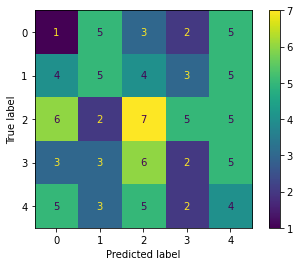

In [4]:
cm = confusion_matrix(gts, preds, labels=classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,  display_labels=classes)
disp.plot()
plt.savefig('cm.svg')

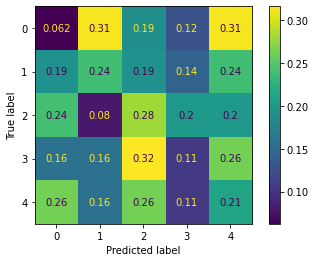

In [5]:
ncm = confusion_matrix(gts, preds, labels=classes, normalize='true')
ndisp = ConfusionMatrixDisplay(confusion_matrix=ncm,  display_labels=classes)
ndisp.plot()
plt.savefig('ncm.svg')

## Seaborn heatmap


In [6]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
from pathlib import Path

In [8]:

def plot(matrix, nc, normalize=True, save_dir='', names=()):
    import seaborn as sn

    array = matrix / ((matrix.sum(0).reshape(1, -1) + 1E-9) if normalize else 1)  # normalize columns
    array[array < 0.005] = np.nan  # don't annotate (would appear as 0.00)

    fig, ax = plt.subplots(1, 1, figsize=(12, 9), tight_layout=True)
    nc, nn = nc, len(names)  # number of classes, names
    sn.set(font_scale=1.0 if nc < 50 else 0.8)  # for label size
    labels = (0 < nn < 99) and (nn == nc)  # apply names to ticklabels
    ticklabels = (names + ['background']) if labels else 'auto'
    with warnings.catch_warnings():
        warnings.simplefilter('ignore')  # suppress empty matrix RuntimeWarning: All-NaN slice encountered
        sn.heatmap(array,
                    ax=ax,
                    annot=nc < 30,
                    annot_kws={
                        'size': 25},
                    cmap='Blues', # Blues/viridis
                    fmt='.2f',
                    square=True,
                    vmin=0.0,
                    xticklabels=ticklabels,
                    yticklabels=ticklabels).set_facecolor((1, 1, 1))
    
    # Set colorbar fontsize
    cbar = ax.collections[0].colorbar
    cbar.ax.tick_params(labelsize=25)

    # Set Axis fontsize
    ax.set_xlabel('GroundTruth', fontsize=25)
    ax.set_ylabel('Predicted', fontsize=25)

    # Set Title fontsize
    ax.set_title('Confusion Matrix', fontsize=25)

    # Set ticks fontsize
    plt.xticks(fontsize= 25)
    plt.yticks(fontsize= 25)

    fig.savefig(Path(save_dir) / 'confusion_matrix.svg', dpi=250)
    plt.show()
    plt.close(fig)

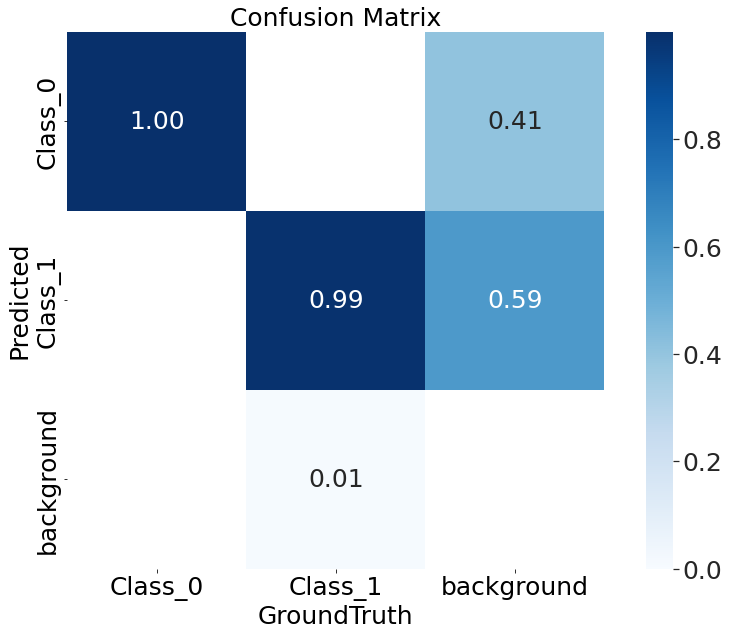

In [9]:
nc = 2
matrix = np.zeros((nc + 1, nc + 1))
matrix[0,0] = 1.0
matrix[0,2] = 0.41
matrix[1,1] = 0.99
matrix[1,2] = 0.59
matrix[2,1] = 0.01
names = ['Class_0','Class_1']
plot(matrix = matrix, nc = nc, normalize=True, save_dir='', names=names)